In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

from mlxtend.evaluate import feature_importance_permutation

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sn

In [2]:
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')

In [3]:
df

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,00027e2894dd2f3fe4ff320a6d332d18e465b5c8ba2e79...,JC201794,NaN,03/27/2019 04:20:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,4.0,0.0,16,4,3,41.994704,-87.699395,POINT (-87.699395085278 41.994703544264)
1,0002fb938eb0feaea33820fa55b71e4ea0b332125e1510...,JB175900,NaN,03/06/2018 03:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,3.0,0.0,15,3,3,41.904671,-87.716685,POINT (-87.716685434641 41.904671135876)
2,0003fc68d857da032b1beafa8f7893ce0b123ce6b2dee5...,HZ488533,NaN,10/25/2016 02:10:00 PM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,14,3,10,41.706808,-87.642771,POINT (-87.642771373276 41.706807861572)
3,00060f93d2ae8d4e4c7fe75ac17055dd69a081d0b928a5...,JD123586,NaN,01/21/2020 04:16:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,...,1.0,0.0,1.0,0.0,16,3,1,41.791610,-87.703356,POINT (-87.703355598231 41.791609871969)
4,0006882952e53c291df267014a03b57684383e9ad66d9e...,JC459747,NaN,10/04/2019 12:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,12,6,10,41.848490,-87.675599,POINT (-87.67559940405 41.848490427751)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398685,7412aff8ad5fd9fa02750ac5993cb59a43d609c13b36d4...,JB332535,NaN,07/02/2018 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,6.0,0.0,18,2,7,41.735715,-87.661993,POINT (-87.661992662801 41.735714804611)
398686,be972c2f9104860ba3b38c4208b74d1d92641736248e42...,JC346058,NaN,07/12/2019 04:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,4.0,0.0,16,6,7,41.907814,-87.775408,POINT (-87.775408056534 41.907814460403)
398687,82aa5cd836d77c28cd50d157af9dd697307c975c8d3686...,JA237504,NaN,04/24/2017 04:30:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,16,2,4,41.791349,-87.723255,POINT (-87.723255322969 41.791349423725)
398688,855017044ca271cd0cfa23806a99ee664857857b8a5385...,JC240615,NaN,04/26/2019 07:10:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,19,6,4,41.877844,-87.646782,POINT (-87.646781834111 41.877843584048)


In [4]:
# Checking out the dataframe columns
df.PRIM_CONTRIBUTORY_CAUSE.value_counts().index

Index(['UNABLE TO DETERMINE', 'FAILING TO YIELD RIGHT-OF-WAY',
       'FOLLOWING TOO CLOSELY', 'NOT APPLICABLE',
       'IMPROPER OVERTAKING/PASSING', 'IMPROPER BACKING',
       'FAILING TO REDUCE SPEED TO AVOID CRASH', 'IMPROPER LANE USAGE',
       'IMPROPER TURNING/NO SIGNAL', 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
       'WEATHER', 'DISREGARDING TRAFFIC SIGNALS',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'DISREGARDING STOP SIGN', 'DISTRACTION - FROM INSIDE VEHICLE',
       'EQUIPMENT - VEHICLE CONDITION',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'PHYSICAL CONDITION OF DRIVER',
       'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'EXCEEDING AUTHORIZED SPEED LIMIT',
       'DISTRACTION - FROM OUTSIDE VEHICLE', 'DRIVING ON WRONG SIDE/WRONG WAY',
       'EXCEEDING SAFE SPEED FOR CONDITIONS',
       'ROAD ENGINEERING/SURFACE/MARKING DEFECTS',
       'ROAD CONSTRUCTION/MAINT

In [5]:
# filling all na with UNKNOWN string, so we can encode later
df.fillna('UNKOWN', inplace=True)

In [6]:
# dropping the unecessary columns that does not make sense
df.drop(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'RD_NO', 'REPORT_TYPE', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 
         'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'WORKERS_PRESENT_I', 'INJURIES_UNKNOWN', 'LONGITUDE', 'LATITUDE',
         'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL','INJURIES_INCAPACITATING', 
         'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'DAMAGE',
         'DATE_POLICE_NOTIFIED', 'CRASH_TYPE','NUM_UNITS','STREET_DIRECTION','STREET_NAME', 'LANE_CNT'], axis=1, inplace=True)

In [7]:
df

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,03/27/2019 04:20:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,16,4,3,POINT (-87.699395085278 41.994703544264)
1,03/06/2018 03:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,15,3,3,POINT (-87.716685434641 41.904671135876)
2,10/25/2016 02:10:00 PM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,Y,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,14,3,10,POINT (-87.642771373276 41.706807861572)
3,01/21/2020 04:16:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,16,3,1,POINT (-87.703355598231 41.791609871969)
4,10/04/2019 12:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,FOLLOWING TOO CLOSELY,IMPROPER TURNING/NO SIGNAL,UNKOWN,UNKOWN,UNKOWN,12,6,10,POINT (-87.67559940405 41.848490427751)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398685,07/02/2018 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,18,2,7,POINT (-87.661992662801 41.735714804611)
398686,07/12/2019 04:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,FOLLOWING TOO CLOSELY,FAILING TO REDUCE SPEED TO AVOID CRASH,UNKOWN,UNKOWN,UNKOWN,16,6,7,POINT (-87.775408056534 41.907814460403)
398687,04/24/2017 04:30:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,...,Y,UNABLE TO DETERMINE,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,16,2,4,POINT (-87.723255322969 41.791349423725)
398688,04/26/2019 07:10:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,UNKOWN,FOLLOWING TOO CLOSELY,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,19,6,4,POINT (-87.646781834111 41.877843584048)


In [8]:
# We have speed limits that are not logged correctly, so we will drop them.
# There wasn't a lot so this will not effect our data
list_ = [3, 9, 99, 39, 1, 2, 32, 33, 6, 24, 11, 34, 18, 12, 36, 7, 14, 16, 38, 31, 22, 23, 63, 4, 26]
for n in list_:
    df.drop(index=df[df['POSTED_SPEED_LIMIT'] == n].index, inplace=True)

In [9]:
df

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,03/27/2019 04:20:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,16,4,3,POINT (-87.699395085278 41.994703544264)
1,03/06/2018 03:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,15,3,3,POINT (-87.716685434641 41.904671135876)
2,10/25/2016 02:10:00 PM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,Y,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,14,3,10,POINT (-87.642771373276 41.706807861572)
3,01/21/2020 04:16:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,16,3,1,POINT (-87.703355598231 41.791609871969)
4,10/04/2019 12:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,FOLLOWING TOO CLOSELY,IMPROPER TURNING/NO SIGNAL,UNKOWN,UNKOWN,UNKOWN,12,6,10,POINT (-87.67559940405 41.848490427751)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398685,07/02/2018 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,18,2,7,POINT (-87.661992662801 41.735714804611)
398686,07/12/2019 04:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,FOLLOWING TOO CLOSELY,FAILING TO REDUCE SPEED TO AVOID CRASH,UNKOWN,UNKOWN,UNKOWN,16,6,7,POINT (-87.775408056534 41.907814460403)
398687,04/24/2017 04:30:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,...,Y,UNABLE TO DETERMINE,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,16,2,4,POINT (-87.723255322969 41.791349423725)
398688,04/26/2019 07:10:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,UNKOWN,FOLLOWING TOO CLOSELY,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,19,6,4,POINT (-87.646781834111 41.877843584048)


## OneHotEncoding: FIRST_CRASH_TYPE

In [10]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [11]:
# Creating a new dataframe for FIRST_CRASH_TYPE
# Then we will OneHotEncode the data to categories
crash_type = df['FIRST_CRASH_TYPE']
crash_df = pd.DataFrame(crash_type, columns=['FIRST_CRASH_TYPE'])
crash_df = pd.DataFrame(ohe.fit_transform(crash_df[['FIRST_CRASH_TYPE']]).toarray())

In [12]:
# Each column will be a FIRST_CRASH_TYPE, so we will need to label each column
crash_col = df['FIRST_CRASH_TYPE'].unique()
crash_df.columns = crash_col

In [13]:
crash_df.columns

Index(['ANGLE', 'SIDESWIPE SAME DIRECTION', 'REAR END', 'PEDESTRIAN',
       'PARKED MOTOR VEHICLE', 'TURNING', 'HEAD ON', 'PEDALCYCLIST',
       'SIDESWIPE OPPOSITE DIRECTION', 'OTHER NONCOLLISION', 'FIXED OBJECT',
       'OTHER OBJECT', 'REAR TO FRONT', 'REAR TO SIDE', 'REAR TO REAR',
       'TRAIN', 'OVERTURNED', 'ANIMAL'],
      dtype='object')

## LabelEncoding: FEATURES

In [14]:
# Here we select the features we want to use and LabelEncode them using a for loop
# We will also create a new dataframe for them
text_col = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 
            'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I',
            'HIT_AND_RUN_I', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE','DOORING_I', 'WORK_ZONE_I', 
            'WORK_ZONE_TYPE']
en_df = pd.DataFrame()
for col in text_col:
    encoder = LabelEncoder()
    en_df[col] = encoder.fit_transform(df[col])
    
en_df

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,4,3,2,3,8,3,0,1,1,1,1,18,26,1,1,3
1,4,3,2,3,8,3,0,1,1,1,1,36,36,1,1,3
2,16,6,2,3,8,3,0,1,1,1,2,36,36,1,1,3
3,4,3,2,3,6,3,0,1,2,1,1,36,36,1,1,3
4,16,1,2,3,8,3,0,1,2,1,1,19,24,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398281,4,3,2,3,8,3,0,2,1,1,1,36,36,1,1,3
398282,16,1,2,3,8,3,0,1,1,1,1,19,17,1,1,3
398283,4,3,2,3,12,3,0,5,1,1,2,36,26,1,1,3
398284,4,3,2,3,2,3,0,1,1,1,1,19,26,1,1,3


In [15]:
no_en_df = ['POSTED_SPEED_LIMIT','CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LOCATION']
no_en_df = pd.DataFrame(df[no_en_df])
no_en_df

,POSTED_SPEED_LIMIT,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,30,16,4,3,POINT (-87.699395085278 41.994703544264)
1,30,15,3,3,POINT (-87.716685434641 41.904671135876)
2,30,14,3,10,POINT (-87.642771373276 41.706807861572)
3,30,16,3,1,POINT (-87.703355598231 41.791609871969)
4,30,12,6,10,POINT (-87.67559940405 41.848490427751)
...,...,...,...,...,...
398685,30,18,2,7,POINT (-87.661992662801 41.735714804611)
398686,30,16,6,7,POINT (-87.775408056534 41.907814460403)
398687,15,16,2,4,POINT (-87.723255322969 41.791349423725)
398688,30,19,6,4,POINT (-87.646781834111 41.877843584048)


In [16]:
# Merge the FIRST_CRASH_TYPE and the LabelEncoded dataframe together
df2 = pd.merge(crash_df, en_df, left_index=True, right_index=True)

In [17]:
# Here we have the Features and all Crash types 
df2.columns

Index(['ANGLE', 'SIDESWIPE SAME DIRECTION', 'REAR END', 'PEDESTRIAN',
       'PARKED MOTOR VEHICLE', 'TURNING', 'HEAD ON', 'PEDALCYCLIST',
       'SIDESWIPE OPPOSITE DIRECTION', 'OTHER NONCOLLISION', 'FIXED OBJECT',
       'OTHER OBJECT', 'REAR TO FRONT', 'REAR TO SIDE', 'REAR TO REAR',
       'TRAIN', 'OVERTURNED', 'ANIMAL', 'TRAFFIC_CONTROL_DEVICE',
       'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'DOORING_I',
       'WORK_ZONE_I', 'WORK_ZONE_TYPE'],
      dtype='object')

## TARGET: Rear End

In [18]:
# Defining our Features and Target
# For X, we want to remove all of the other CRASH types and keep the features.
y = df2['REAR END']
X = df2.drop(columns=['REAR END','ANGLE', 'SIDESWIPE SAME DIRECTION', 'PEDESTRIAN',
       'PARKED MOTOR VEHICLE', 'TURNING', 'HEAD ON', 'PEDALCYCLIST',
       'SIDESWIPE OPPOSITE DIRECTION', 'OTHER NONCOLLISION',
       'FIXED OBJECT', 'OTHER OBJECT', 'REAR TO FRONT', 'REAR TO SIDE',
       'REAR TO REAR', 'TRAIN', 'OVERTURNED', 'ANIMAL'], axis=1)

## Vanilla - DecisionTreeClassifier: Rear End

In [19]:
# Train and Test on a Vanilla model (test size to 20%)
dt_model = DecisionTreeClassifier(random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [20]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [21]:
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

In [23]:
# Test: accuracy_score with diff. parameters
# 0.9491827562831103 (stratify=y ONLY) <--- Decided to use this parameter only since it returned a higher score. 
# 0.8689271636244947 (BOTH class_weight='balanced and stratify=y'
# 0.868148836275076 (class_weight='balanced' ONLY)

0.9491827562831103

In [25]:
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred)}')

Accuracy Score Train: 0.978598867645028
Accuracy Score Test: 0.9491827562831103
ROC_AUC Test: 0.6030698428311908


### Feature Importance DTC

In [26]:
# Lets look at which feature is the most important
dt_model.feature_importances_

array([0.04712941, 0.03688977, 0.06528513, 0.0731335 , 0.19580236,
       0.03253467, 0.06312757, 0.05957491, 0.0336915 , 0.08174355,
       0.03469498, 0.14054641, 0.12390562, 0.00112367, 0.00512463,
       0.00569232])

In [27]:
# TRAFFICWAY_TYPE, PRIM_CONTRIBUTORY_CAUSE, SEC_CONTRIBUTORY_CAUSE, NOT_RIGHT_OF_WAY_I, 
# LIGHTING_CONDITION, WEATHER_CONDITION
# seems to be the most important
X

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,4,3,2,3,8,3,0,1,1,1,1,18,26,1,1,3
1,4,3,2,3,8,3,0,1,1,1,1,36,36,1,1,3
2,16,6,2,3,8,3,0,1,1,1,2,36,36,1,1,3
3,4,3,2,3,6,3,0,1,2,1,1,36,36,1,1,3
4,16,1,2,3,8,3,0,1,2,1,1,19,24,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398281,4,3,2,3,8,3,0,2,1,1,1,36,36,1,1,3
398282,16,1,2,3,8,3,0,1,1,1,1,19,17,1,1,3
398283,4,3,2,3,12,3,0,5,1,1,2,36,26,1,1,3
398284,4,3,2,3,2,3,0,1,1,1,1,19,26,1,1,3


Feature ranking:
1. feature 4 (0.195802)
2. feature 11 (0.140546)
3. feature 12 (0.123906)
4. feature 9 (0.081744)
5. feature 3 (0.073134)
6. feature 2 (0.065285)
7. feature 6 (0.063128)
8. feature 7 (0.059575)
9. feature 0 (0.047129)
10. feature 1 (0.036890)
11. feature 10 (0.034695)
12. feature 8 (0.033691)
13. feature 5 (0.032535)
14. feature 15 (0.005692)
15. feature 14 (0.005125)
16. feature 13 (0.001124)


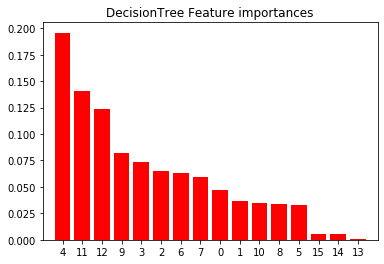

In [28]:
# Here we graph out which feature is the most imporant.

importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("DecisionTree Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [29]:
# This plot tree helper function can plot the DecisionTreeClassifier 
# We can check what feature our model is splitting on and what are the requirements
def plot_tree(dt, used_cols, out_file='mytree.png'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

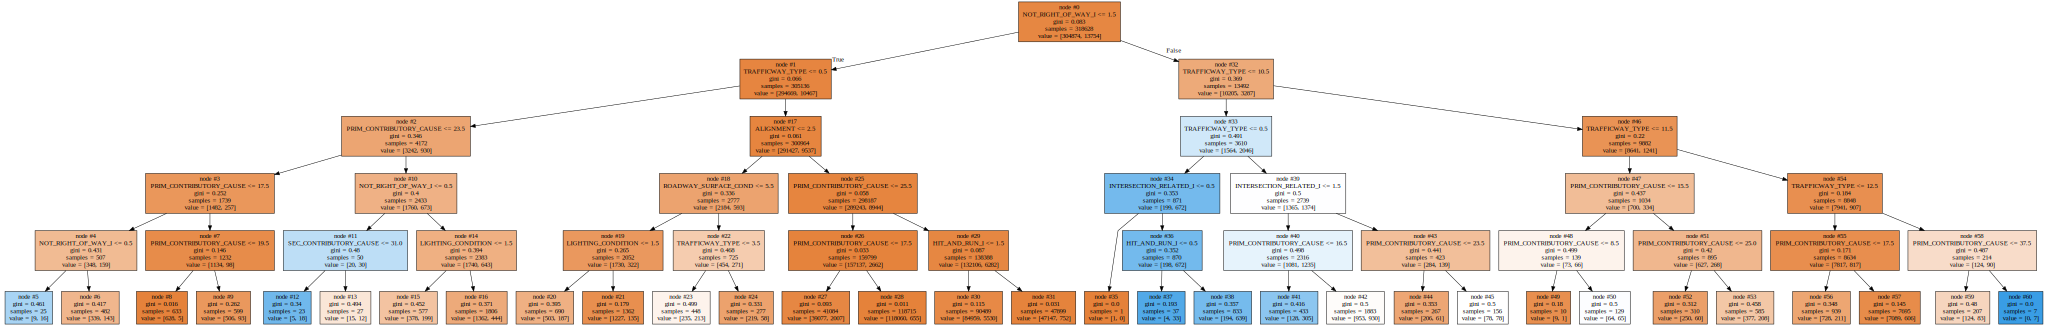

In [30]:
# Since we have a lot of data, lets only set max_depth=5
# This will speed up the process to graph
dt_model2 = DecisionTreeClassifier(random_state=1, max_depth=5)
dt_model2.fit(X_train, y_train)
plot_tree(dt_model2, X.columns.tolist())

### DTC(Rear End): w/ Parameters

In [31]:
# Changing the models parameters if we could get a better score
dt_model2 = DecisionTreeClassifier(random_state=1, max_depth=10, max_leaf_nodes=30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [32]:
dt_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [33]:
# Our scores
y_train_pred2 = dt_model2.predict(X_train)
y_test_pred2 = dt_model2.predict(X_test)
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred2)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred2)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred2)}')

Accuracy Score Train: 0.9596582848964937
Accuracy Score Test: 0.9597027291671897
ROC_AUC Test: 0.5696825262715062


### Looks like our Vanilla DecisionTree model did better.

## Vanilla RandomForestClassifier: Rear End (minor parameter changes)

In [34]:
rf = RandomForestClassifier(class_weight='balanced', random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [35]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [36]:
print(f'Accuracy Score Train: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred)}')
# ROC_AUC: It tells how much a model is capable of distinguishing between classes.

Accuracy Score Train: 0.926487942051546
Accuracy Score Test: 0.8989555349117477
ROC_AUC Test: 0.6626472327051802


- stratify=y (ONLY)
- Accuracy Score Train: 0.9785863138205054
- Accuracy Score Test: 0.9565768661025885
- ROC_AUC Test: 0.5944350490886352

- class_weight='balanced' (ONLY)
- Accuracy Score Train: 0.9228473329399801
- Accuracy Score Test: 0.894160034145974
- ROC_AUC Test: 0.6537365887087091

#### Decicded to use these parameters since they were the higher roc_auc_score. 
- stratify=y & class_weight='balanced' (BOTH)
- Accuracy Score Train: 0.926487942051546
- Accuracy Score Test: 0.8989555349117477
- ROC_AUC Test: 0.6626472327051802

### Feature Importance: RandomForestClassifier

Feature ranking:
1. feature 11 (0.246301)
2. feature 4 (0.147413)
3. feature 9 (0.110185)
4. feature 12 (0.093448)
5. feature 3 (0.074300)
6. feature 10 (0.060792)
7. feature 0 (0.058055)
8. feature 7 (0.043846)
9. feature 2 (0.038244)
10. feature 6 (0.034415)
11. feature 1 (0.032980)
12. feature 8 (0.025969)
13. feature 5 (0.025902)
14. feature 14 (0.003833)
15. feature 15 (0.002866)
16. feature 13 (0.001453)


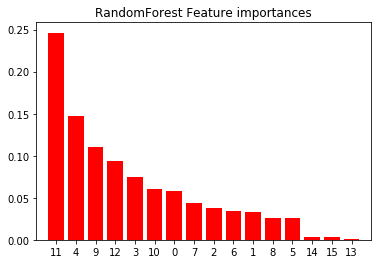

In [37]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("RandomForest Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [38]:
X
#PRIM_CONTRIBUTORY_CAUSE, TRAFFICWAY_TYPE, NOT_RIGHT_OF_WAY_I

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,4,3,2,3,8,3,0,1,1,1,1,18,26,1,1,3
1,4,3,2,3,8,3,0,1,1,1,1,36,36,1,1,3
2,16,6,2,3,8,3,0,1,1,1,2,36,36,1,1,3
3,4,3,2,3,6,3,0,1,2,1,1,36,36,1,1,3
4,16,1,2,3,8,3,0,1,2,1,1,19,24,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398281,4,3,2,3,8,3,0,2,1,1,1,36,36,1,1,3
398282,16,1,2,3,8,3,0,1,1,1,1,19,17,1,1,3
398283,4,3,2,3,12,3,0,5,1,1,2,36,26,1,1,3
398284,4,3,2,3,2,3,0,1,1,1,1,19,26,1,1,3


## RandomForestClassifier: Hyperparameters (GridSearchCV)

In [39]:
# Here we set a some parameters that the GridSearch will run through.
grid_p = {"n_estimators": [50, 100],
          "criterion": ["gini", "entropy"],
          "max_depth": [4, 6, 10],
          "min_samples_split": [5, 10],
          "min_samples_leaf": [5, 10],
         "max_samples": [400]}

grid_search = GridSearchCV(rf, grid_p, n_jobs=-1, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                             

In [40]:
grid_search.best_score_

0.8107810190937267

In [41]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_samples': 400,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

{'criterion': 'gini',
 'max_depth': 6,
 'max_samples': 400,
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 50}
 
ROC_AUC_SCORE: 0.7902454236508376
------------------------------------------------
{'criterion': 'entropy',
 'max_depth': 10,
 'max_samples': 400,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 100}
 
ROC_AUC_SCORE: 0.8107810190937267
-----------------------------------------------

## Data Visual: Rear End Crashes

In [42]:
# Feature 4
df['TRAFFICWAY_TYPE'].value_counts()

NOT DIVIDED                        180247
DIVIDED - W/MEDIAN (NOT RAISED)     72831
ONE-WAY                             52837
PARKING LOT                         28686
DIVIDED - W/MEDIAN BARRIER          24302
OTHER                               11672
FOUR WAY                             7858
ALLEY                                6320
UNKNOWN                              4319
CENTER TURN LANE                     3557
T-INTERSECTION                       1699
DRIVEWAY                             1393
RAMP                                 1303
UNKNOWN INTERSECTION TYPE             535
Y-INTERSECTION                        216
FIVE POINT, OR MORE                   206
TRAFFIC ROUTE                         155
NOT REPORTED                           65
ROUNDABOUT                             53
L-INTERSECTION                         32
Name: TRAFFICWAY_TYPE, dtype: int64

In [43]:
# Feature 11
df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

UNABLE TO DETERMINE                                                                 144274
FAILING TO YIELD RIGHT-OF-WAY                                                        44802
FOLLOWING TOO CLOSELY                                                                44168
NOT APPLICABLE                                                                       21461
IMPROPER OVERTAKING/PASSING                                                          19291
IMPROPER BACKING                                                                     18005
FAILING TO REDUCE SPEED TO AVOID CRASH                                               16560
IMPROPER LANE USAGE                                                                  16111
IMPROPER TURNING/NO SIGNAL                                                           13479
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  12416
WEATHER                                                                               6622

In [46]:
# Selecting the columns with only "REAR END" crashes
rear_end = df[df['FIRST_CRASH_TYPE'] == 'REAR END']
rear_end.TRAFFICWAY_TYPE.value_counts().index
rear_end.PRIM_CONTRIBUTORY_CAUSE.value_counts().index

Index(['FOLLOWING TOO CLOSELY', 'UNABLE TO DETERMINE',
       'FAILING TO REDUCE SPEED TO AVOID CRASH', 'NOT APPLICABLE',
       'IMPROPER BACKING', 'WEATHER', 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE',
       'FAILING TO YIELD RIGHT-OF-WAY', 'DISTRACTION - FROM INSIDE VEHICLE',
       'IMPROPER OVERTAKING/PASSING', 'IMPROPER LANE USAGE',
       'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER',
       'EXCEEDING SAFE SPEED FOR CONDITIONS', 'EQUIPMENT - VEHICLE CONDITION',
       'DISTRACTION - FROM OUTSIDE VEHICLE', 'PHYSICAL CONDITION OF DRIVER',
       'EXCEEDING AUTHORIZED SPEED LIMIT', 'DISREGARDING TRAFFIC SIGNALS',
       'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)',
       'CELL PHONE USE OTHER THAN TEXTING',
       'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)',
       'IMPROPER TURNING/NO SIGNAL', 'ROAD CONSTRUCTION/MAINTENANCE',
       'DISREGARDING STOP SIGN',
       'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE

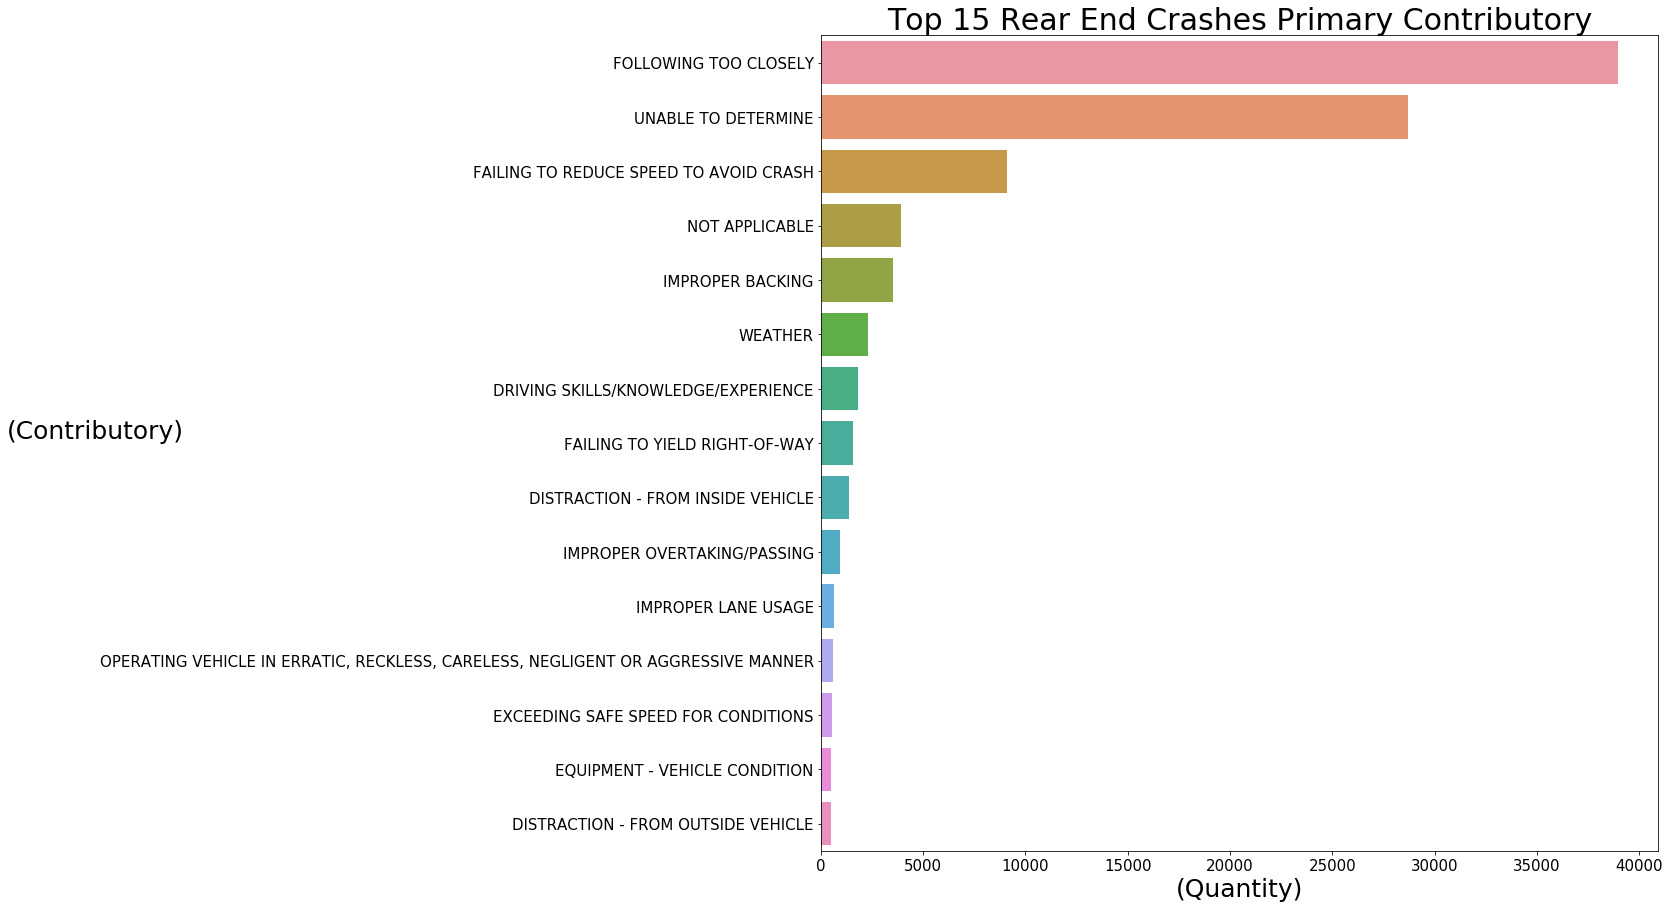

In [47]:
# Bar graph of the top 15 PRIMARY_CONTRIBUTORY

plt.figure(figsize=(15,15))

y= rear_end.PRIM_CONTRIBUTORY_CAUSE.value_counts().values[:15]
x=rear_end.PRIM_CONTRIBUTORY_CAUSE.value_counts().index[:15]

sn.barplot(y, x)
plt.title('Top 15 Rear End Crashes Primary Contributory', size=30)
plt.ylabel("(Contributory)", size=25, rotation=0)
plt.xlabel("(Quantity)", size=25)
plt.xticks(size=15)
plt.yticks(size=15);

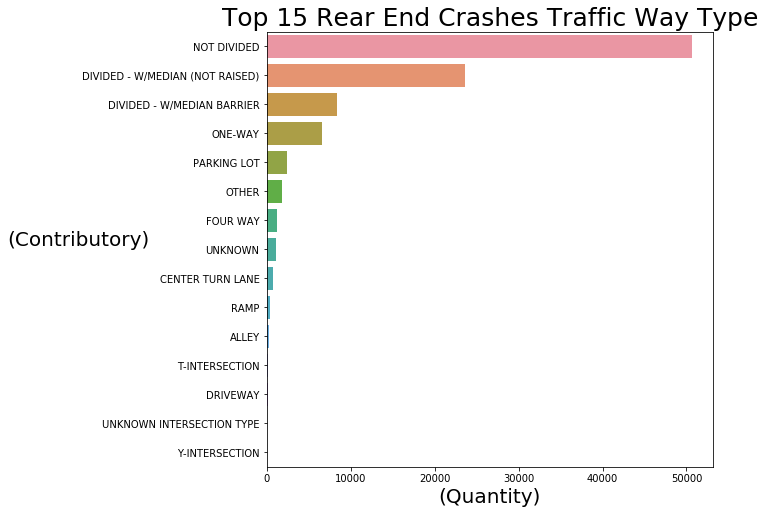

In [48]:
# Bar graph of top 15 TrafficWay Types

plt.figure(figsize=(8,8))

y= rear_end.TRAFFICWAY_TYPE.value_counts().values[:15]
x=rear_end.TRAFFICWAY_TYPE.value_counts().index[:15]

sn.barplot(y, x)
plt.title('Top 15 Rear End Crashes Traffic Way Type', size=25)
plt.ylabel("(Contributory)", size=20, rotation=0)
plt.xlabel("(Quantity)", size=20)
plt.xticks(size=10)
plt.yticks(size=10);